 Dataset Loaded Successfully!
Original Shape: (284807, 31)
Sampled Shape (for faster execution): (10000, 31)

 Dataset Overview:
            Time         V1        V2         V3        V4         V5  \
43428    41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
49906    44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413   
29474    35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806   
276481  167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785   
278846  168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179   

              V6         V7        V8        V9  ...       V21       V22  \
43428  -2.832404 -16.701694  7.517344 -8.507059  ...  1.190739 -1.127670   
49906   1.015887  -0.524379  0.224060  0.899746  ... -0.213436 -0.942525   
29474   0.040444  -0.712567  0.002299 -0.971747  ...  0.102398  0.168269   
276481 -0.630647   0.276990  0.586025 -0.484715  ...  0.358932  0.873663   
278846 -0.956571   0.043241 -0.160746  0.363241  ...

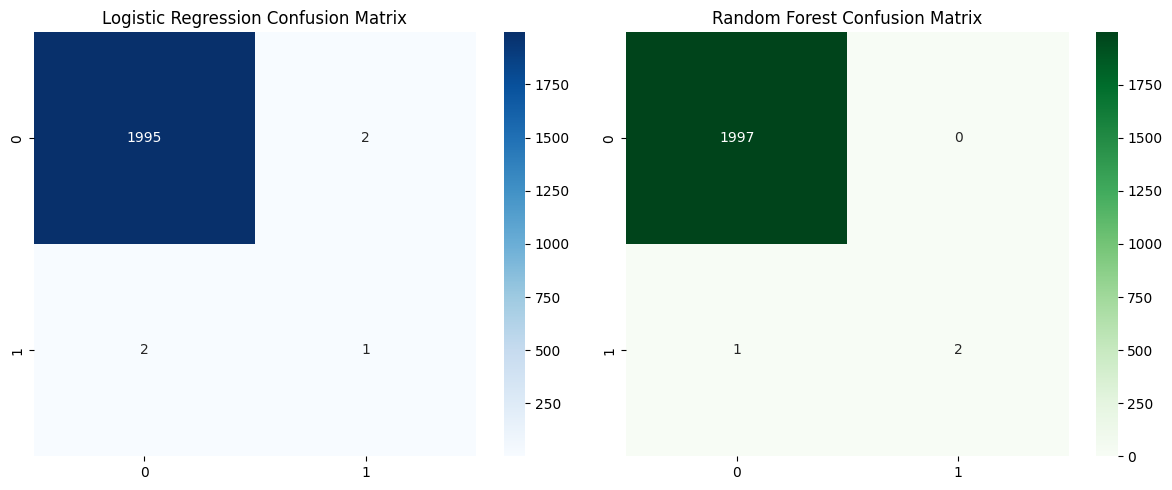


 Insights:
1 Logistic Regression gives a decent baseline but may miss some fraud cases.
2 Random Forest performs better and detects more frauds due to ensemble learning.
3 Fraud data is highly imbalanced — next step: use SMOTE or undersampling.
4 This builds your first baseline classification model for fraud detection.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv("creditcard.csv")
print(" Dataset Loaded Successfully!")
print(f"Original Shape: {df.shape}")
df = df.sample(10000, random_state=42)
print(f"Sampled Shape (for faster execution): {df.shape}")
print("\n Dataset Overview:")
print(df.head())
print("\nClass Distribution:")
print(df["Class"].value_counts())
X = df.drop("Class", axis=1)
y = df["Class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("\n Model Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print("\n Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("\n Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()
print("\n Insights:")
print("1 Logistic Regression gives a decent baseline but may miss some fraud cases.")
print("2 Random Forest performs better and detects more frauds due to ensemble learning.")
print("3 Fraud data is highly imbalanced — next step: use SMOTE or undersampling.")
print("4 This builds your first baseline classification model for fraud detection.")
